In [1]:
pwd

'c:\\Users\\ADMIN\\Documents\\projects\\practice'

## 프로젝트 1

In [64]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
df_X = data.data
df_y = data.target

In [65]:
df_y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [66]:
import numpy as np

X = np.array(df_X)
y = np.array(df_y)

print(X)
print(y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990749
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06833155
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286131
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04688253
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452873
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00422151
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

print(X_train.shape)
print(y_train.shape)

(353, 10)
(353,)


In [68]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()    

print(len(W))

10


In [69]:
def model(X, W, b):
    predictions = 0
    for i in range(len(W)):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [70]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [71]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [72]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [73]:
LEARNING_RATE = 0.1

In [74]:
%%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, 9001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 5336.7795
Iteration 200 : Loss 4847.4877
Iteration 300 : Loss 4491.6363
Iteration 400 : Loss 4229.2889
Iteration 500 : Loss 4032.8172
Iteration 600 : Loss 3883.0728
Iteration 700 : Loss 3766.7533
Iteration 800 : Loss 3674.5892
Iteration 900 : Loss 3600.0966
Iteration 1000 : Loss 3538.7177
Iteration 1100 : Loss 3487.2291
Iteration 1200 : Loss 3443.3341
Iteration 1300 : Loss 3405.3804
Iteration 1400 : Loss 3372.1666
Iteration 1500 : Loss 3342.8074
Iteration 1600 : Loss 3316.6407
Iteration 1700 : Loss 3293.1628
Iteration 1800 : Loss 3271.9837
Iteration 1900 : Loss 3252.7958
Iteration 2000 : Loss 3235.3516
Iteration 2100 : Loss 3219.4486
Iteration 2200 : Loss 3204.9181
Iteration 2300 : Loss 3191.6171
Iteration 2400 : Loss 3179.4233
Iteration 2500 : Loss 3168.2303
Iteration 2600 : Loss 3157.9448
Iteration 2700 : Loss 3148.4845
Iteration 2800 : Loss 3139.7760
Iteration 2900 : Loss 3131.7537
Iteration 3000 : Loss 3124.3586
Iteration 3100 : Loss 3117.5375
Iteration 3200 : 

In [75]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2349.6722505156554)

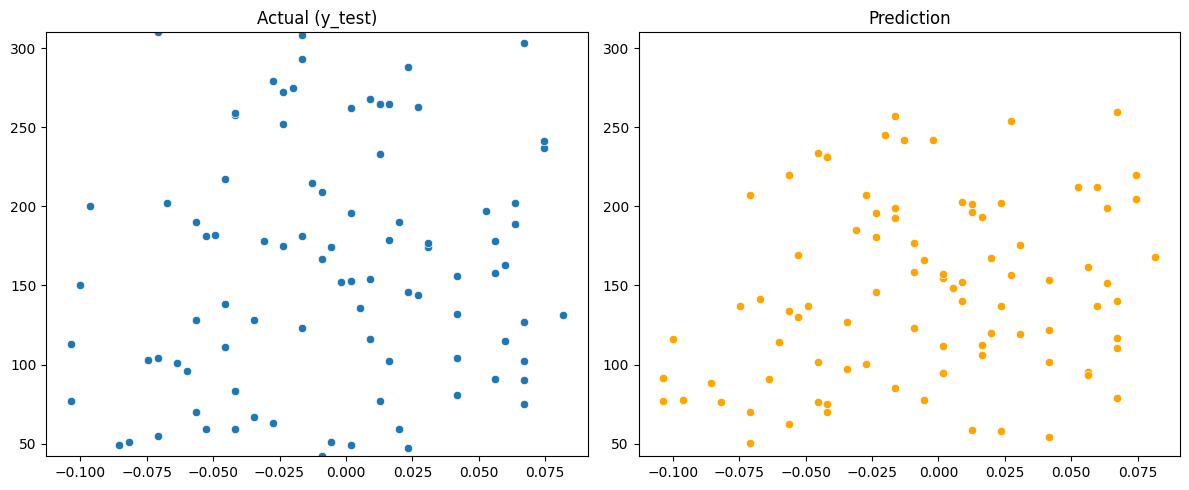

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 가로로 긴 형태가 비교하기 좋으므로 figsize 조절 (12, 5)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 2. 실제 데이터 시각화
sns.scatterplot(x=X_test[:, 0], y=y_test, ax=axes[0])
axes[0].set_title("Actual (y_test)")

# 3. 예측 데이터 시각화
sns.scatterplot(x=X_test[:, 0], y=prediction, ax=axes[1], color="orange")
axes[1].set_title("Prediction")

# 4. 중요: 두 그래프의 Y축 범위를 강제로 통일
# 실제 데이터의 최솟값과 최댓값을 기준으로 설정
y_min, y_max = y_test.min(), y_test.max()
axes[0].set_ylim(y_min, y_max)
axes[1].set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()

## 프로젝트 2

In [54]:
import pandas as pd

train = pd.read_csv("./data/bike-sharing-demand/train.csv")
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [55]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

In [56]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


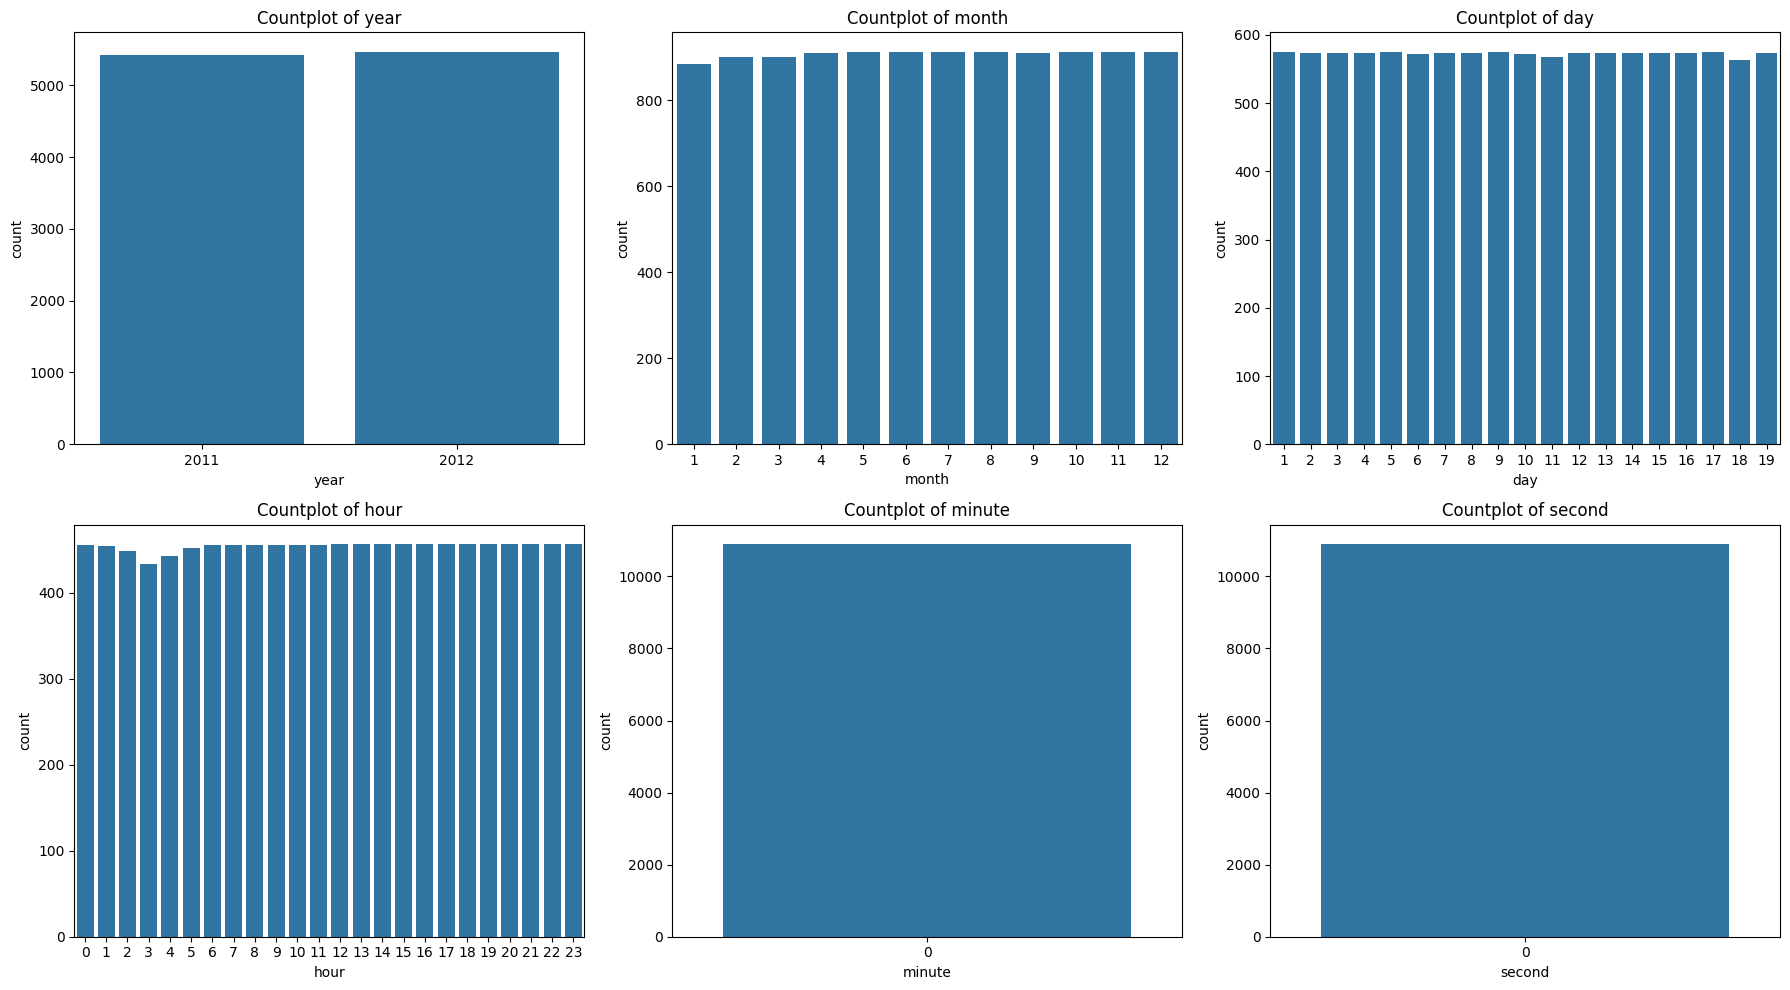

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
cols = ['year', 'month', 'day', 'hour', 'minute', 'second']
for ax, col in zip(axes.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

In [59]:
features = ['year', 'month', 'day', 'hour', 'temp', 'humidity', 'windspeed']
X = train[features]
y = train['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [60]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [61]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 19961.901814435536
RMSE: 141.28659460272775


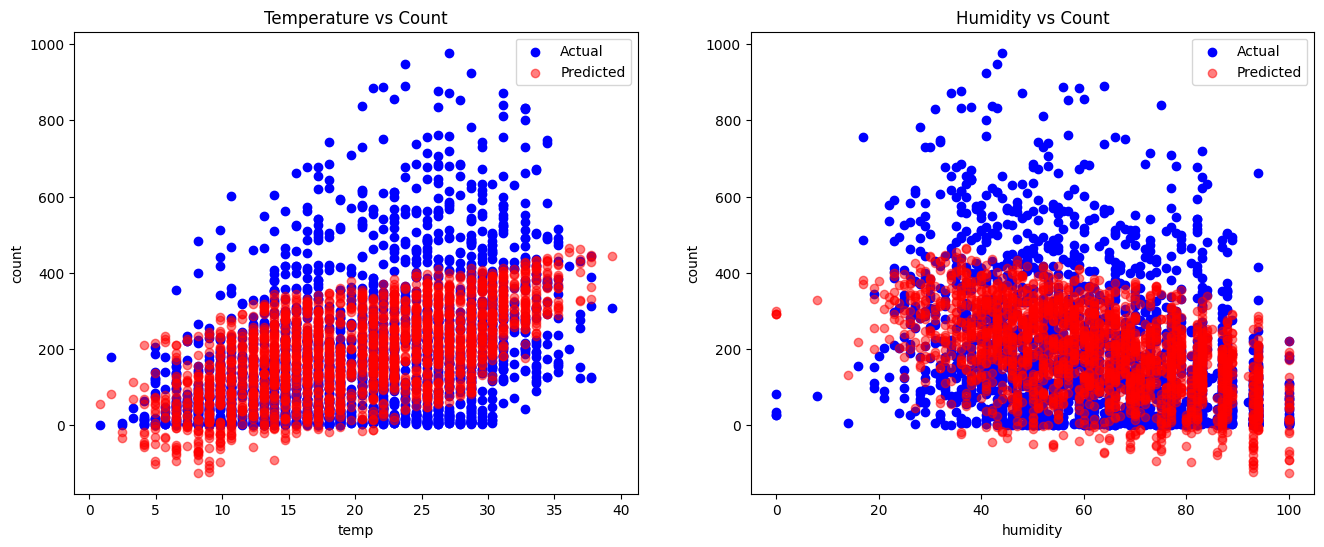

In [62]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_test['humidity'], y_test, color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

## 회고
- 이번 프로젝트를 하면서 느낀점, 배운 점
    - 단순한 머신러닝 예제를 통해 직접 수식과 함수가 어떻게 구성되는지 알 수 있어 직관성에 도움이 되었다.

- 이번 프로젝트에서 잘 했다고 생각이 드는 점
    - 조금 늦긴 했지만 그래도 마무리를 했다.

- 이번 프로젝트에서 느낀 문제점
    - 데이터를 학습에 최적화 시키는 과정을 아직 너무 많이 모른다.
    
- 다음에는 이렇게 해야겠다 생각한 점
    - 다음에는 실습코드에 의존성을 줄이고 좀 더 스스로 데이터의 형태부터 스스로 학습에 맞게 설계해보고 싶다. 이번에는 그러기엔 시간이 너무나도 많이 부족했다.